In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs

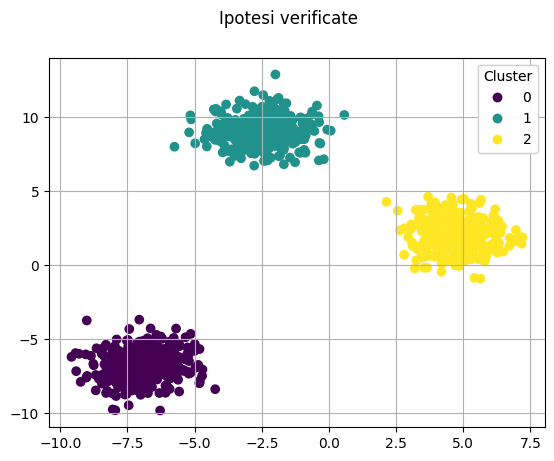

In [9]:
def fit_plot(
    cls,
    X,
    title: str) -> None:
    """ Wrapper per il fit ed il plot delle predizioni.

    Args:
        cls: algoritmo di clustering
        X: dati su cui effettuare il clustering
        title: titolo del plot
    """
    preds = cls.fit_predict(X)
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=preds)
    legend = ax.legend(
        *scatter.legend_elements(),
        title='Cluster')
    ax.add_artist(legend)
    fig.suptitle(title)
    ax.grid()
    plt.show()

# Esercizio E20.4
X, y = make_blobs(n_samples=1000, random_state=42)
kmeans = KMeans(n_clusters=3, n_init='auto')
fit_plot(kmeans, X, 'Ipotesi verificate')

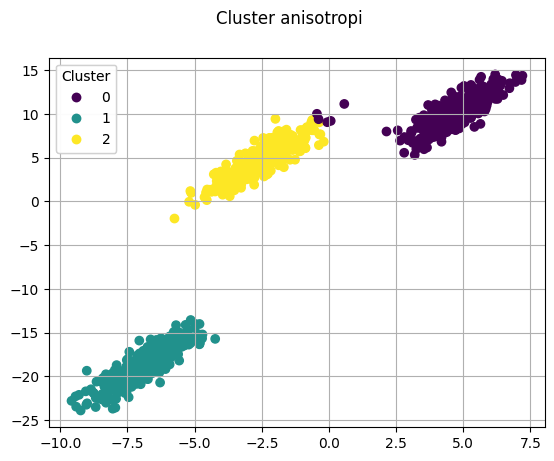

In [10]:
# Ipotesi 1: anisotropia
t = np.tan(np.radians(60))
rot = np.array([[1, t], [0, 1]])
X_an = X.dot(rot)

fit_plot(kmeans, X_an, 'Cluster anisotropi')

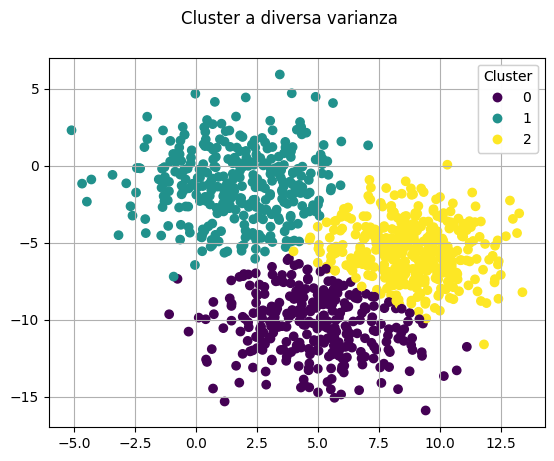

In [11]:
# Ipotesi 2: diversa varianza
X_var, y_var = make_blobs(
    n_samples=1000,
    random_state=200,
    cluster_std=[1.8, 2.5, 2.4])

fit_plot(kmeans, X_var, 'Cluster a diversa varianza')

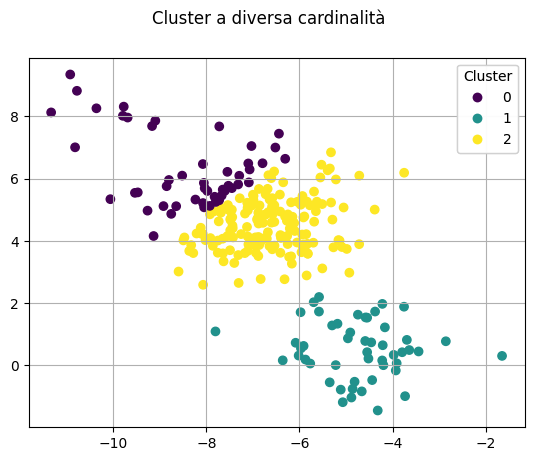

In [12]:
# Ipotesi 3: diversa cardinalità
X, y = make_blobs(n_samples=1000, random_state=12)
X_uneven = np.concatenate(
    (X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]),
    axis=0)

fit_plot(kmeans, X_uneven, 'Cluster a diversa cardinalità')

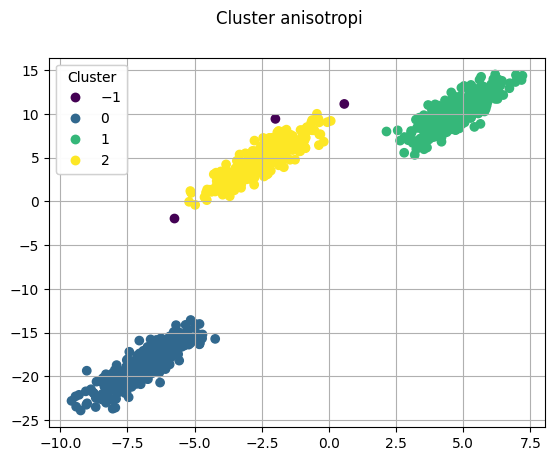

In [26]:
# Esercizio 20.5
# Ipotesi 1: anisotropia
dbscan = DBSCAN(eps=1, min_samples=10)
fit_plot(dbscan, X_an, 'Cluster anisotropi')

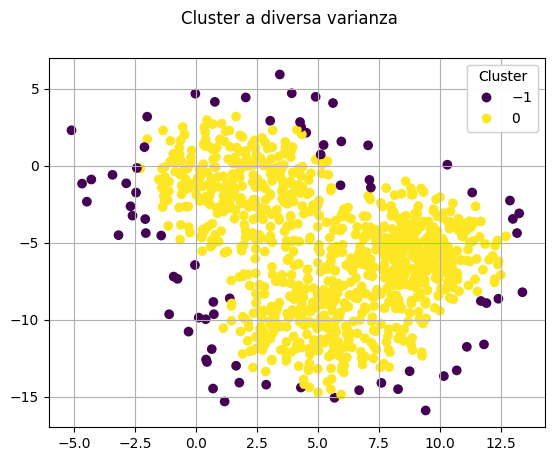

In [27]:
# Ipotesi 2: diversa varianza
fit_plot(dbscan, X_var, 'Cluster a diversa varianza')

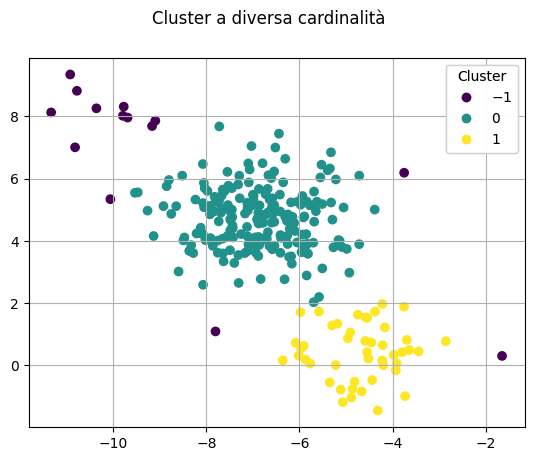

In [28]:
# Ipotesi 3: diversa cardinalità
fit_plot(dbscan, X_uneven, 'Cluster a diversa cardinalità')